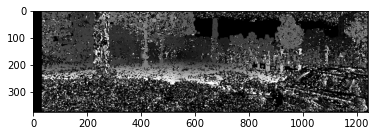

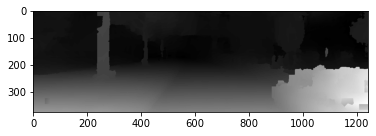

In [164]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

ROOT_DIR = os.path.abspath("../")
imgL_file = os.path.join(ROOT_DIR, "left.png")
imgR_file = os.path.join(ROOT_DIR, "right.png")
imgL = cv.imread(imgL_file,0)
imgR = cv.imread(imgR_file,0)
img=cv.imread(r"D:\Data_KITTI\demo-kitti\depth\000000.png",0)

stereo = cv.StereoBM_create(numDisparities=32, blockSize=5)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')

plt.show()
plt.imshow(img,'gray')

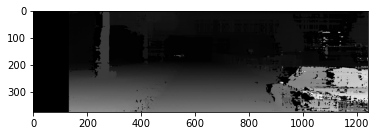

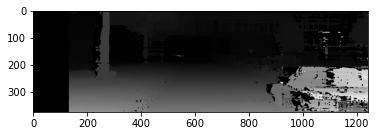

In [165]:
# disparity range tuning
window_size = 7
min_disp = 0
num_disp = 320 - min_disp


imgL = cv.imread(imgL_file,cv.IMREAD_COLOR)
imgR = cv.imread(imgR_file,cv.IMREAD_COLOR)

stereo = cv.StereoSGBM_create(
    minDisparity=5,
    numDisparities=128,  # max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=3,
    P1=8 * 3 * window_size ** 2,
    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=1,
    speckleWindowSize=100,
    speckleRange=96,
    preFilterCap=5,
    mode=cv.STEREO_SGBM_MODE_SGBM_3WAY
)
disparity2 = stereo.compute(imgL, imgR).astype(np.float32) / 16.0
disparity2=abs(disparity2)
plt.imshow(disparity2, 'gray')
plt.show()
after=cv.medianBlur(disparity2,3)
plt.imshow(after, 'gray')
r=cv.GaussianBlur(disparity2,(5,5),0,0)
#plt.imshow(after, 'gray')
plt.imshow(r, 'gray')
plt.imshow(after, 'gray')


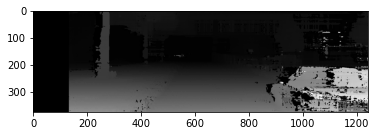

In [162]:
disparity3 = cv.normalize(disparity2, disparity2, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
plt.imshow(disparity3,'gray')
plt.show()
